In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
col_names = []
for c in columns:
    print(c['name'], c["type"])
    col_names.append(c['name'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

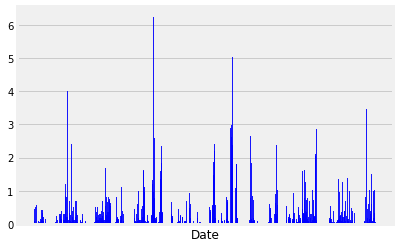

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
most_recent = engine.execute('SELECT date FROM measurement ORDER BY date DESC LIMIT 1').fetchall()
# Calculate the date 1 year ago from the last data point in the database
most_recent = most_recent[0][0]
date_recent = pd.Timestamp(most_recent)
year_recent = date_recent - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
prcp_data = engine.execute('SELECT date, prcp FROM measurement WHERE date > 2016-08-23 ORDER BY date DESC LIMIT 2021').fetchall()
prcp_df = pd.DataFrame(prcp_data)
prcp_df.columns = ['date', 'prcp']
# prcp_df.head()
# # Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df.to_csv('precipitation.csv')
# bar_one = plt.bar(db_one['date'], db_one['prcp'])
# bar_one
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(len(prcp_df['date']))
y_axis = prcp_df['prcp']

prcp_bar = plt.bar(prcp_df['date'], y_axis, color='blue', alpha=0.9, align='center')
plt.xticks([])
plt.xlabel('Date')
plt.savefig('precipitation.png')


![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,1833.000000
mean,0.161189
std,0.422946
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
station_count = engine.execute('SELECT COUNT(station) FROM station').fetchall()
station_count

[(9,)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_each = engine.execute('SELECT DISTINCT station, COUNT(station) from measurement GROUP BY station ORDER BY COUNT(station) DESC').fetchall()
# List the stations and the counts in descending order.
station_df1 = pd.DataFrame(station_each)
station_df1.columns = ['station', 'count']
station_df1.head(9)

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
highest_temp = engine.execute('SELECT station, tobs FROM measurement WHERE station = "USC00519281" ORDER BY tobs DESC LIMIT 1').fetchall()
# highest temperature recorded, and average temperature most active station?
avg_temp = engine.execute('SELECT station, AVG(tobs) FROM measurement WHERE station = "USC00519281"').fetchall()
print(highest_temp)
print(avg_temp)

[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


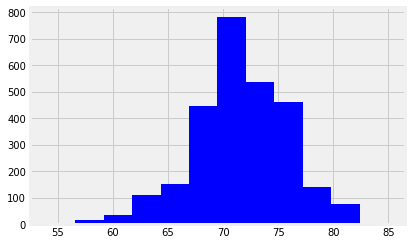

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = engine.execute(
    '''SELECT tobs FROM measurement
    WHERE station = "USC00519281"
    and date > 2016-08-23
    ORDER BY date DESC''').fetchall()
temp_df = pd.DataFrame(temp_query)
temp_df.columns = ['tobs']

# create histogram
x = temp_df.index
y = temp_df['tobs']

plt.hist(y, bins=12, histtype='bar', align='mid', orientation='vertical', color= 'blue')
plt.savefig('temp_histogram.png')

![precipitation](Images/station-histogram.png)

In [40]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
